# Compare logistic regression and kNN

This is an open-ended lab.

You will:

1. Load in the wine dataset (create target, concatenate, normalize predictors)
- Do EDA on predictors
- Select predictors of interest
- Load KNeighborsClassifier and LogisticRegression from sklearn
- Compare performance between the two using stratified cross-validation
- [Optional bonus] Plot the results of kNN vs. Logistic regression using the plotting functions I wrote yesterday and today. You may have to modify the functions to work for you.

---

### Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

1. I usually don't laugh or joke with other people.
2. If I feel depressed, I can cheer myself up with humor.
3. If someone makes a mistake, I will tease them about it.
4. I let people laugh at me or make fun of me at my expense more than I should.
5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
6. Even when I'm alone, I am often amused by the absurdities of life.
7. People are never offended or hurt by my sense of humor.
8. I will often get carried away in putting myself down if it makes family or friends laugh.
9. I rarely make other people laugh by telling funny stories about myself.
10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
13. I laugh and joke a lot with my closest friends.
14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
15. I do not like it when people use humor as a way of criticizing or putting someone down.
16. I don't often say funny things to put myself down.
17. I usually don't like to tell jokes or amuse people.
18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
21. I enjoy making people laugh.
22. If I am feeling sad or upset, I usually lose my sense of humor.
23. I never participate in laughing at others even if all my friends are doing it.
24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
25. I donít often joke around with my friends.
26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
27. If I don't like someone, I often use humor or teasing to put them down.
28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
29. I usually can't think of witty things to say when I'm with other people.
30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

---

### 1. Load humor styles dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [2]:
hsq = pd.read_csv('/Users/ryandunlap/Desktop/DSI-SF-2/datasets/humor_styles/hsq_data.csv')

---

### 2. Create a target and predictor matrix

Target and predictors are up to you. 

In [3]:
hsq.gender = hsq.gender.map(lambda x: 1 if x== 2 else 0)

In [4]:
y = hsq.gender.values
X = hsq[['affiliative','selfenhancing','agressive','selfdefeating','accuracy']].values
feature_names = ['affiliative','selfenhancing','agressive','selfdefeating','accuracy']

In [5]:
hsq_subset = hsq[['affiliative','selfenhancing','agressive','selfdefeating','accuracy','gender']]

---

### 3. Perform any EDA you deem relevant on your predictors and target

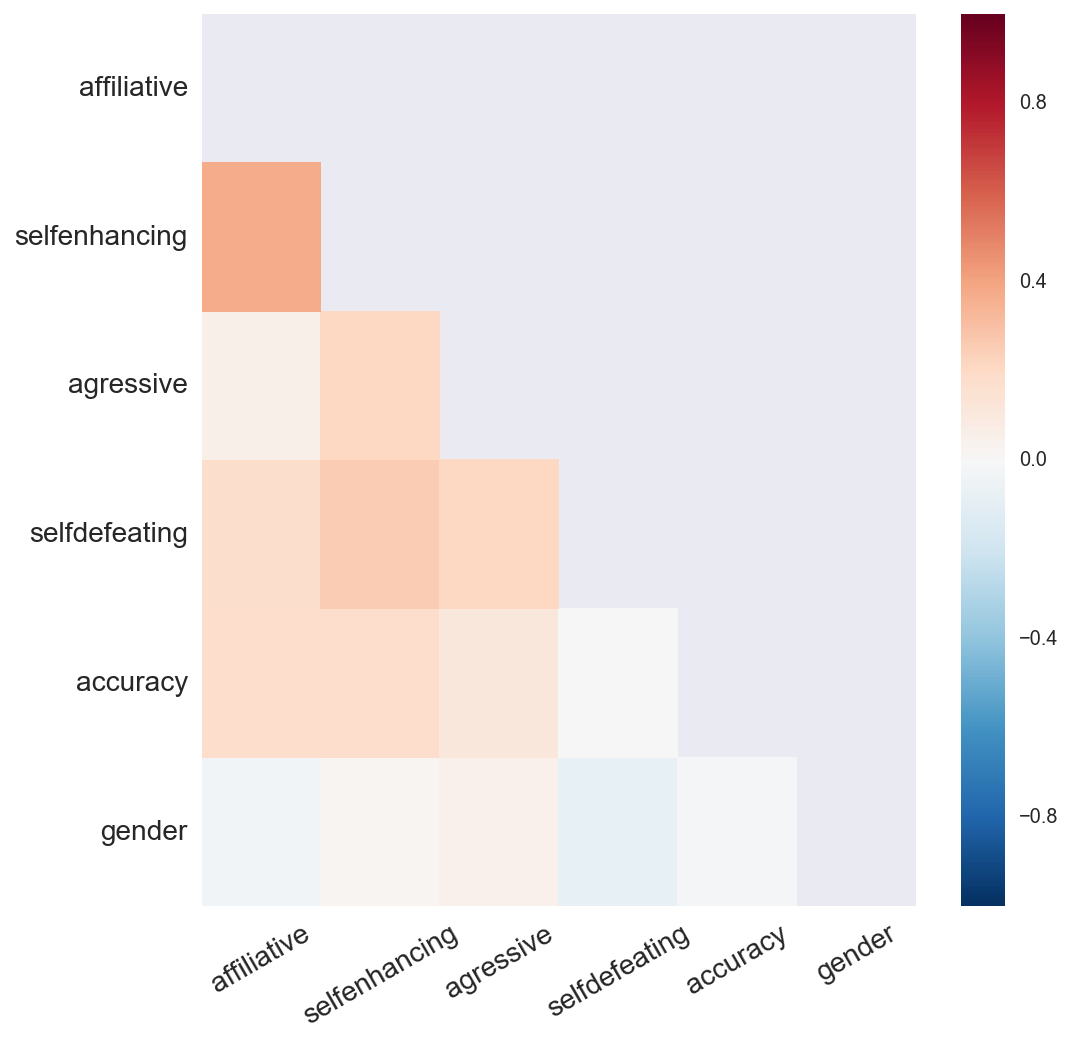

In [6]:
corrs = hsq_subset.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

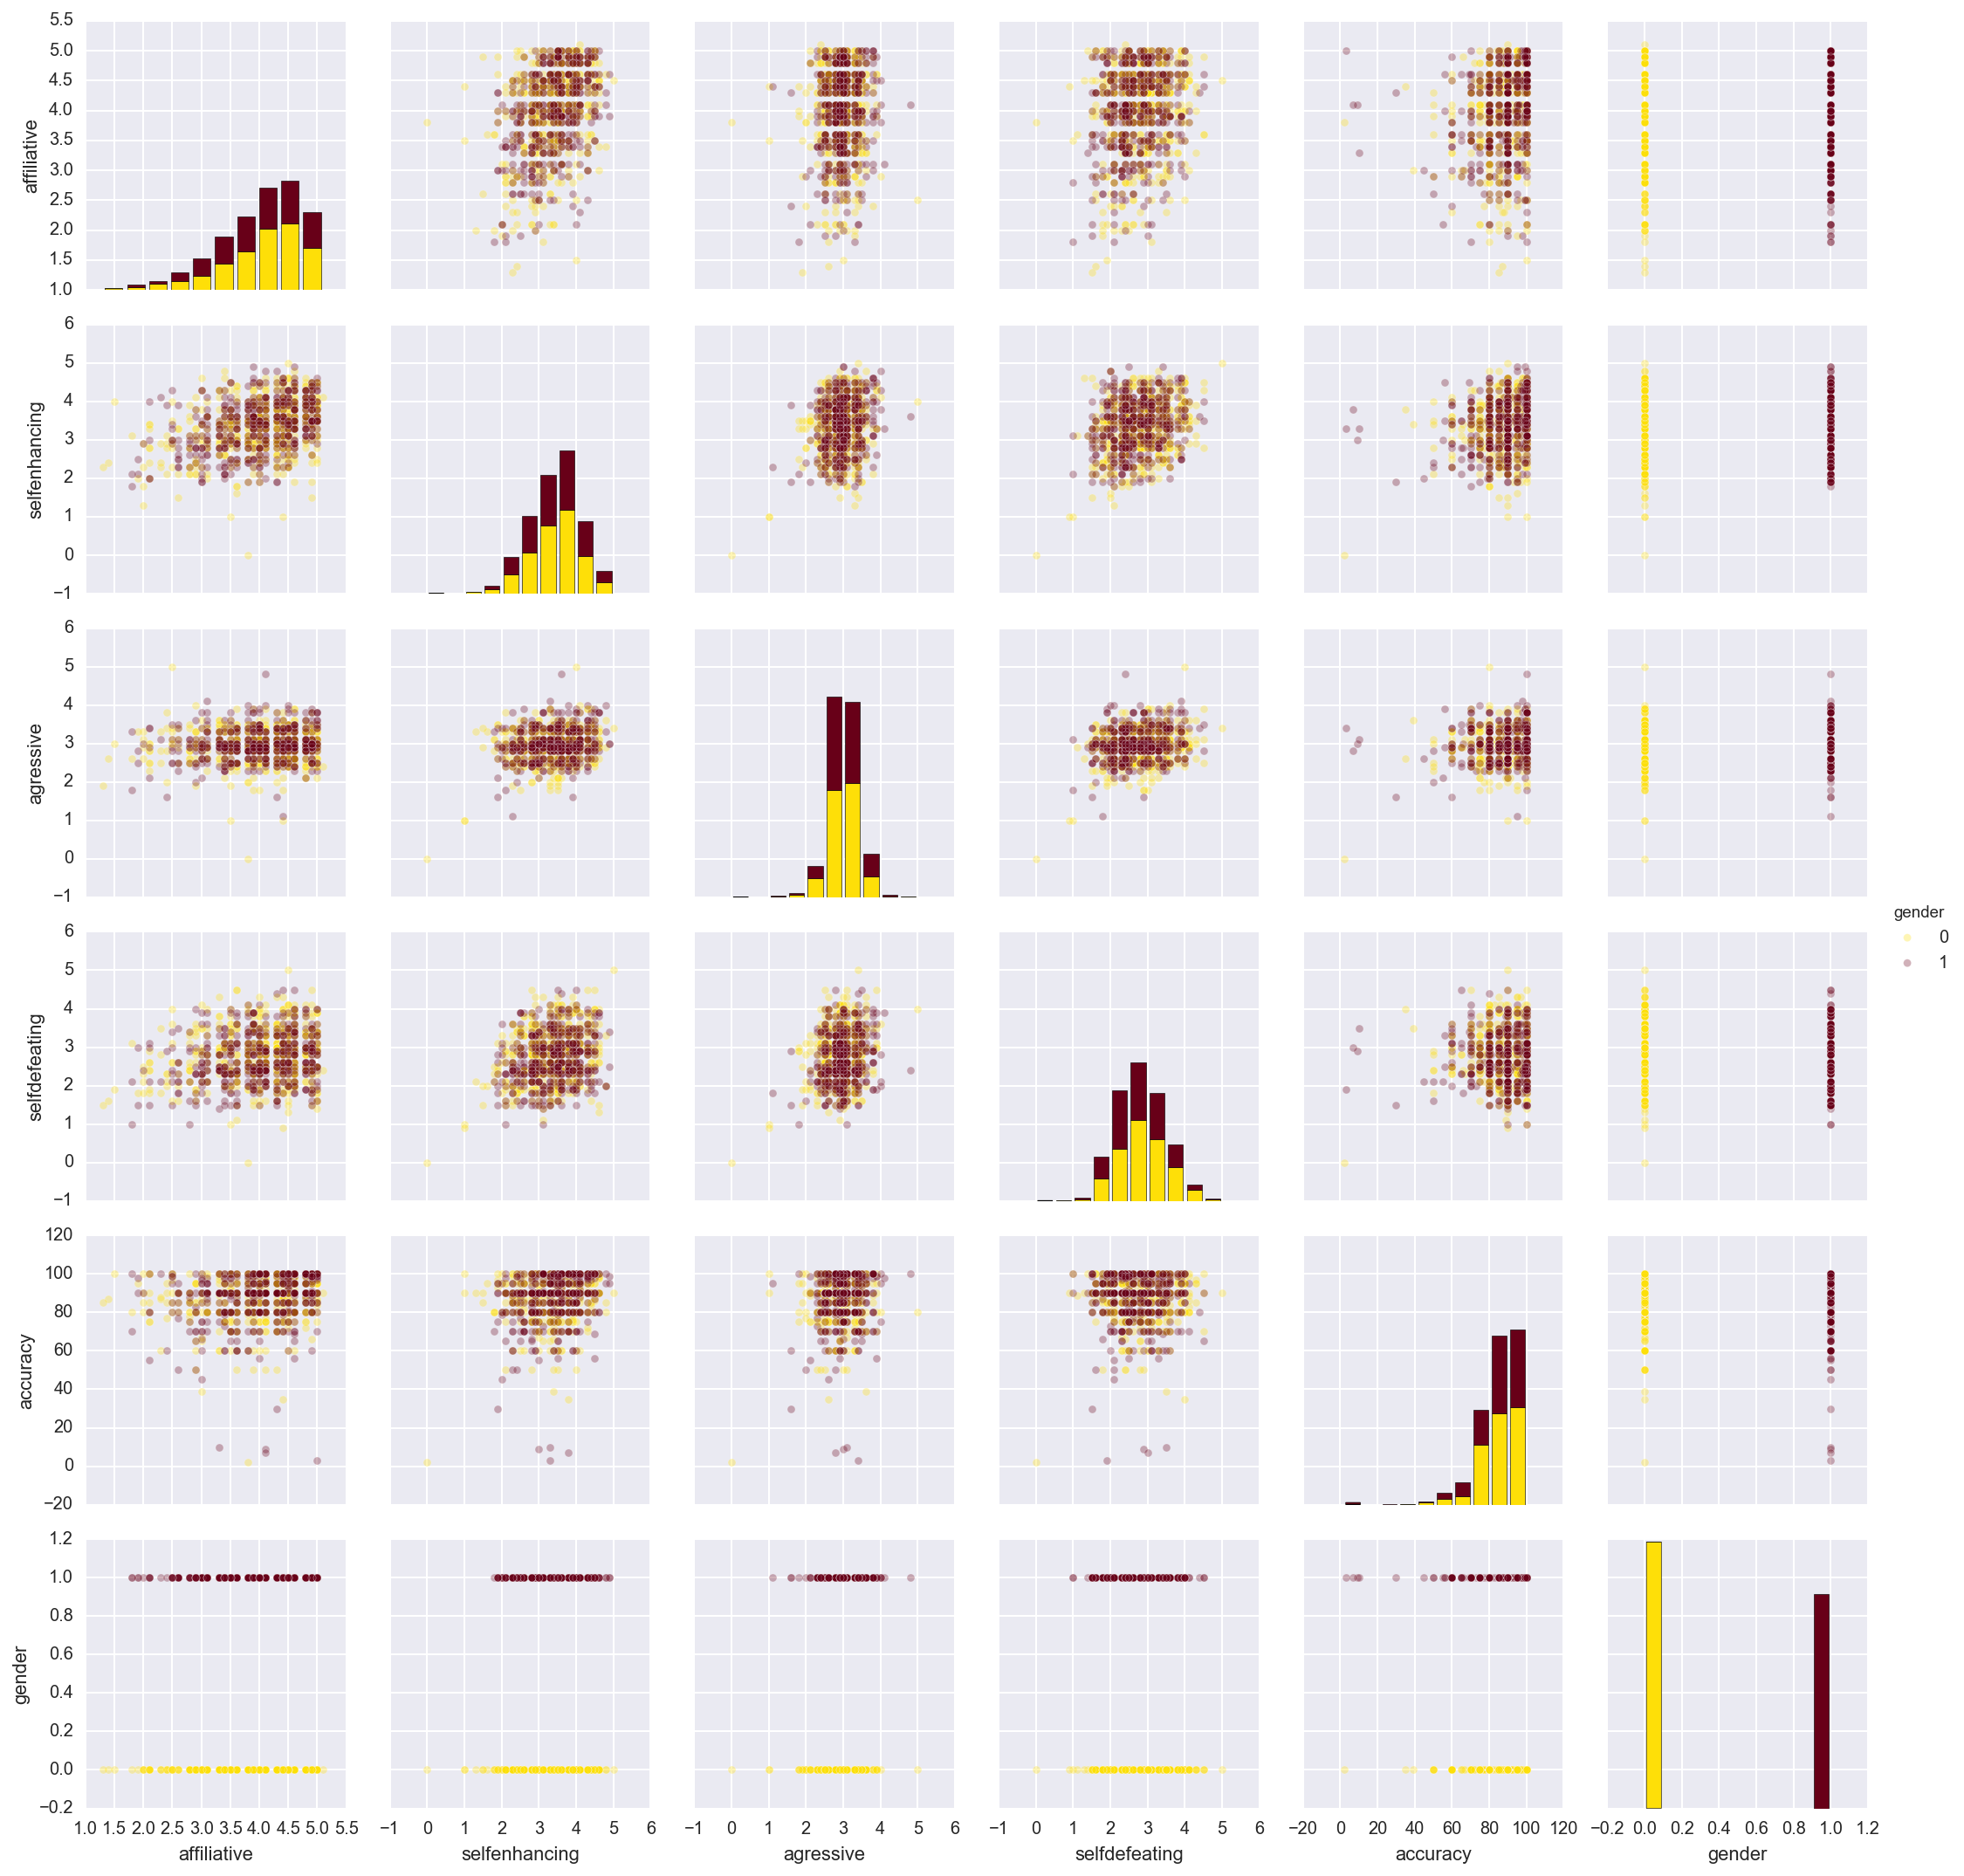

In [7]:
colors = sns.xkcd_palette(['dandelion', 'claret'])

sns.pairplot(data=hsq_subset,
             hue="gender", 
             palette={k:colors[k] for k in range(2)},
             plot_kws=dict(alpha=0.3))

---

### 4. Perform stratified cross-validation on a KNN classifier and logisitic regression.

1. Gridsearch the best KNN parameters.

Note: cross_val_score conveniently does stratification for you when you have a categorical target. :/ So much for forcing you to practice StratifiedKFold...

In [8]:
params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs.fit(X, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    3.8s


{'n_neighbors': 2, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.1s finished


In [14]:
cv_indices = StratifiedKFold(y, n_folds=5)

logreg = LogisticRegression()

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    
    best_knn.fit(Xtr, ytr)
    knn_scores.append(best_knn.score(Xte, yte))
    
    logreg.fit(Xtr, ytr)
    lr_scores.append(logreg.score(Xte, yte))
    
print 'KNN:'
print knn_scores
print np.mean(knn_scores)

print 'Logistic Regression:'
print lr_scores
print np.mean(lr_scores)

print 'Baseline accuracy:', np.mean(y)

KNN:
[0.58139534883720934, 0.59999999999999998, 0.57476635514018692, 0.55140186915887845, 0.57276995305164324]
0.576066705238
Logistic Regression:
[0.56744186046511624, 0.57674418604651168, 0.50934579439252337, 0.56542056074766356, 0.51643192488262912]
0.547076865307
Baseline accuracy: 0.445378151261


---

### 5. Regularization with logistic regression

Since logistic regression _is_ a regression, it can use the Lasso and Ridge penalties.

The `penalty` keyword argument can be set to `l2` for Ridge and `l1` for Lasso. 

Note: you must set `solver='liblinear'` if you're going to use the Lasso penalty!

**`C` is the regularization strength for LogisticRegression, but IT IS THE INVERSE OF ALPHA: 1/alpha. I don't know why they did this – it's stupid.**

1. Select everything but your target to be predictors.
- Normalize the predictors!
- Gridsearch the LogisticRegression with regularization.
- Gridsearch the KNN.
- Compare their cross-validated accuracies.

In [15]:
from sklearn.preprocessing import StandardScaler
X = hsq[[col for col in hsq.columns if col != 'gender']]

ss = StandardScaler()

Xn = ss.fit_transform(X)

In [30]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

from sklearn import linear_model as lm

lm.LassoCV()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   36.9s


{'penalty': 'l1', 'C': 224.48987346938776, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   41.3s finished


In [25]:
knn_gs = GridSearchCV(KNeighborsClassifier(), params, cv=10, verbose=1)

knn_gs.fit(Xn, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   21.8s


{'n_neighbors': 64, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   24.5s finished


In [29]:
cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_knn.fit(Xtr, ytr)
    knn_scores.append(best_knn.score(Xte, yte))
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))
    
print 'KNN:'
print knn_scores
print np.mean(knn_scores)

print 'Logistic Regression:'
print lr_scores
print 'Average LR Score:', sum(lr_scores)/len(lr_scores)
print np.mean(lr_scores)

print 'Baseline accuracy:', np.mean(y)

 KNN:
[0.62325581395348839, 0.57674418604651168, 0.62149532710280375, 0.55140186915887845, 0.57746478873239437]
0.590072396999
Logistic Regression:
[0.63255813953488371, 0.58139534883720934, 0.58878504672897192, 0.58878504672897192, 0.57746478873239437]
Average LR Score 0.593797674112
0.593797674112
Baseline accuracy: 0.445378151261


---

### 6. Explain why that regularization for logistic regression may have been chosen. Print out the most important variables for predicting your target from logistic regression.

The not-strong ridge indicates to me that the variables are decently independent (but some multicollinearity) and that they are all reasonably useful for out-of-sample prediction.

---

### 7. Re-run a (non-regularized) logistic regression with only centered coefficients (not normalized). Interperet the baseline probability and the effect of one of your predictors.

**sklearn's LogisticRegression actually uses l2 Ridge regularization by default with `C=1`! To "turn it off" set `C=1e10`.**

1. Fit the logistic regression using centered predictors.
- Write a function to turn coefficient results to probability (logistic transformation).
- Describe the baseline probability.
- Plot the distribution of one of your predictors.
- Describe based on the coefficient of the predictor the effect on probability of your target variable.

Yes, the baseline probability is different than the mean of the target. This can happen! It's not wrong.